# Implementing KNN Classifier
Along with using Elbow method to determine optimal value for choosing a k-value

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
boston=load_boston()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
#bos['Predict']=boston.target
a=np.random.randint(2, size=506)
bos['Predict']=a

In [35]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predict
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,0.486166
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,0.500303
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,0.000000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,1.000000


## Scaling of Data
Scaling the data as, nearest neighbour checks for the distance between two data points.

In [37]:
from sklearn.preprocessing import StandardScaler
scal= StandardScaler()
scal.fit(bos.drop('Predict',axis=1))
scaled_features = scal.transform(bos.drop('Predict',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=bos.columns[:-1])
df_feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [38]:
x_train,x_test,y_train,y_test= train_test_split(scaled_features,bos['Predict'],test_size=0.3,random_state=101)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
#sns.distplot((pred-y_test))

## Evaluation and prediction

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.48      0.52      0.50        77
          1       0.46      0.43      0.44        75

avg / total       0.47      0.47      0.47       152



### Elbow method

In [44]:
error=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i=knn.predict(x_test)
    error.append(np.mean(predict_i != y_test))

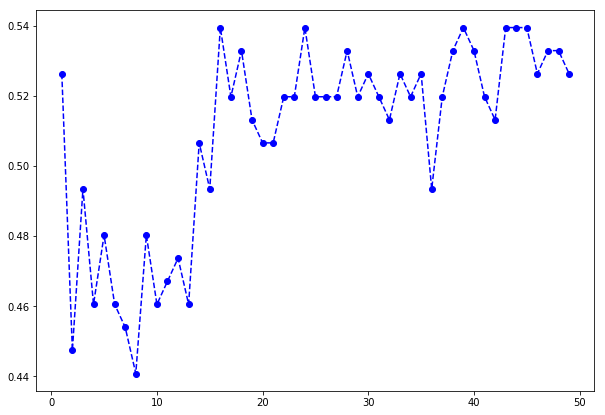

In [50]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,50),error,color='blue',linestyle="--",marker='o')

Seems from graph, that if K=8.7 or so so, the prediction will be better, so lets check that out.

In [69]:
knn_fin = KNeighborsClassifier(n_neighbors=8)
knn_fin.fit(x_train,y_train)
pred_fin=knn_fin.predict(x_test)
print(classification_report(y_test,pred_fin))

             precision    recall  f1-score   support

          0       0.54      0.81      0.65        77
          1       0.61      0.31      0.41        75

avg / total       0.57      0.56      0.53       152

